In [1]:
#importing required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

Importing the IMAGE

In [2]:
image_bgr = cv2.imread('road_in_rorway.jpg')

In [3]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [4]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2GRAY)

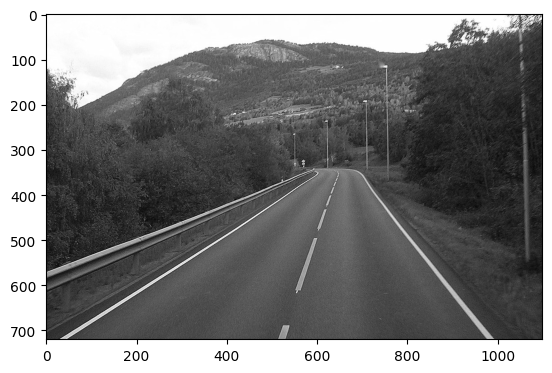

In [5]:
plt.imshow(image_gray, cmap='gray')

Setting The Region Of Interest

In [6]:
image_height = image_gray.shape[0]
image_width = image_gray.shape[1]

In [7]:
region_of_intrest_vertices = np.array([[(0, image_height), (650, 300), (image_width, image_height)]], dtype=np.int32)

In [8]:
image_edges = cv2.Canny(image_gray, 100, 200, apertureSize=3)

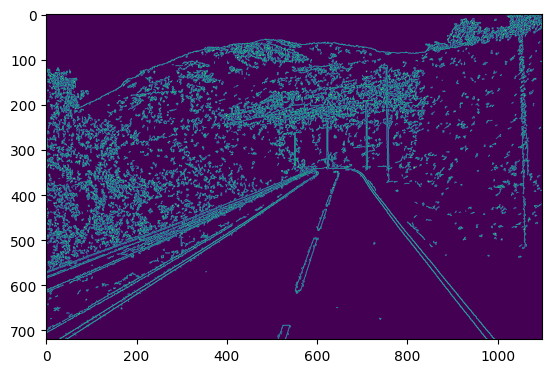

In [9]:
plt.imshow(image_edges)

In [14]:
def region_of_interest(image, points):
    '''Return the masked region interest Image'''
    mask = np.zeros_like(image)
    #color_channel = image_rgb.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, points, match_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [15]:
cropped_image = region_of_interest(image_edges, region_of_intrest_vertices)

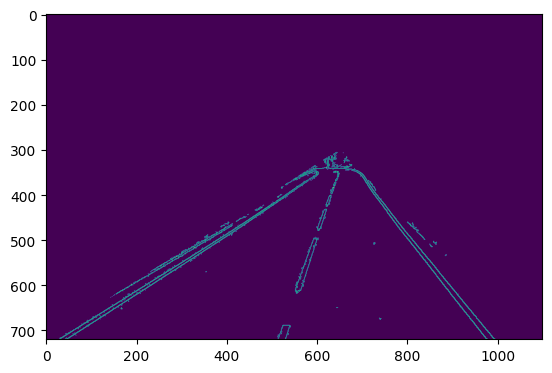

In [16]:
plt.imshow(cropped_image)

In [47]:
image_lines = cv2.HoughLinesP(cropped_image,
                             rho=5,
                             theta=np.pi/180,
                             threshold=100, minLineLength=50, maxLineGap=10)

# Drawing the line over the image

In [48]:
for line in image_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_rgb, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=5)

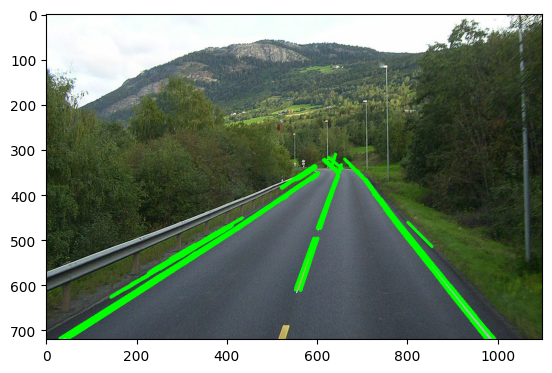

In [49]:
plt.imshow(image_rgb)